<a href="https://colab.research.google.com/github/mystery2828/Machinelearningprojects/blob/master/Pulsemodel3classANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start of model (Pulse 3 class)

### Import the Libraries

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
plt.rcParams['axes.grid'] = True

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the dataset

In [0]:
# Read the dataset as a dataframe
df = pd.read_excel('pulse.xlsx')
df.head(5)

### Convert the class names

In [0]:
# Convert the classes into 'B','C','M'
bcm = df.iloc[:,0]

# Seperate the patient ID from dataframe
df = df.iloc[:,1:]
# Fill all the NaN values
df['PHR'] = df['PHR'].fillna(df['PHR'].mean())

# Rename the classes
for i in range(len(df)):
    df.iloc[i,-1] = bcm[i][0]

# Split the classes from the dataset and assign it to a variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]# Fill all the NaN values
df['PHR'] = df['PHR'].fillna(df['PHR'].mean())

# Rename the classes
for i in range(len(df)):
    df.iloc[i,-1] = bcm[i][0]


### Split the classes as dependent and independent

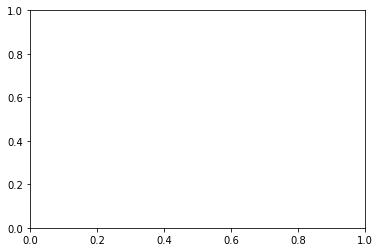

In [0]:
# Split the classes from the dataset and assign it to a variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### SMOTE analysis on the data

In [0]:
col = ['PR', 'PP', 'PT1', 'PT2', 'PT3', 'PDID', 'PHR', 'SVA', 'STRESS',
       'RATIO', 'Unnamed: 11']

# Synthetic Minority oversampling technique to balance the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Scaling the data and Label encoding the data

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Train Test split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create a Sequential model

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1000, activation='relu', kernel_initializer='random_normal', input_dim=10))
#Second  Hidden Layer
classifier.add(Dense(500, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(250, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(10, activation='sigmoid', kernel_initializer='random_normal'))


### Compile the model

In [0]:
classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

### Fit the model

In [0]:
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
312/312 [==============================] - 0s 680us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 2/100
312/312 [==============================] - 0s 313us/step - loss: 0.0522 - accuracy: 0.9872
Epoch 3/100
312/312 [==============================] - 0s 325us/step - loss: 0.0646 - accuracy: 0.9872
Epoch 4/100
312/312 [==============================] - 0s 338us/step - loss: 0.0698 - accuracy: 0.9744
Epoch 5/100
312/312 [==============================] - 0s 327us/step - loss: 0.3330 - accuracy: 0.9615
Epoch 6/100
312/312 [==============================] - 0s 308us/step - loss: 0.0762 - accuracy: 0.9712
Epoch 7/100
312/312 [==============================] - 0s 303us/step - loss: 0.0185 - accuracy: 0.9936
Epoch 8/100
312/312 [==============================] - 0s 294us/step - loss: 0.0287 - accuracy: 0.9840
Epoch 9/100
312/312 [==============================] - 0s 337us/step - loss: 0.0111 - accuracy: 0.9936
Epoch 10/100
312/312 [==============================] - 0s 390us/step - l

### Predict and evaluate for efficiency

In [0]:
pred_train = classifier.predict(X_train)
scores = classifier.evaluate(X_train, y_train)
print('Accuracy on training data ',scores[1])

pred_test = classifier.predict(X_test)
scores2 = classifier.evaluate(X_test, y_test)
print('Accuracy on testing data ',scores2[1])

312/312 [==============================] - 0s 113us/step
Accuracy on training data  1.0
135/135 [==============================] - 0s 66us/step
Accuracy on testing data  0.9185185432434082


# End of model